<a href="https://colab.research.google.com/github/anikch/paddy/blob/main/offline_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from glob import glob
import os
import pandas as pd

train_directory= '/content/drive/MyDrive/thesis/dataset/paddy_doctor/train_images'
train_files= list(glob(os.path.join(train_directory, '*', '*.jpg')))
train_labels= list(map(lambda x: x.split('/')[-2], train_files))
original_df= pd.DataFrame(list(zip(train_files, train_labels)), columns= ['Path','Label'])
original_df.head()

,Path,Label
0,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
1,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
2,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
3,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
4,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight


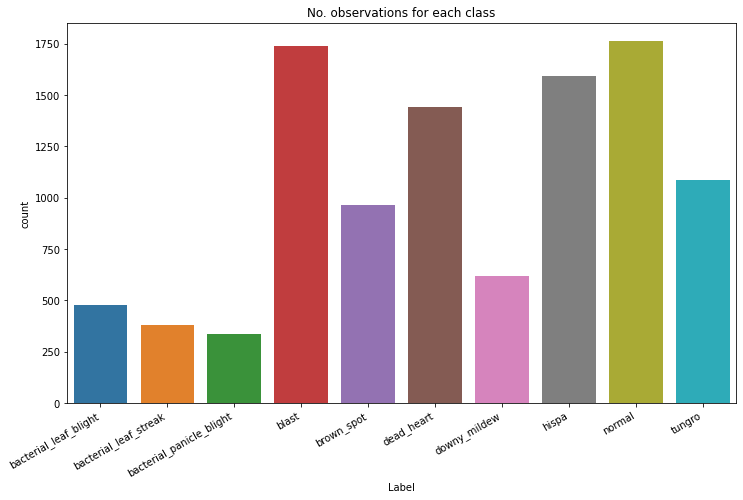

In [8]:
# Plotting using countplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (12,7))
plt.title('No. observations for each class')
plt.xticks(rotation= 30, ha= 'right')
sns.countplot(data= original_df, x= 'Label')
plt.show()

In [10]:
# Checking proportion of classes
original_df.Label.value_counts()

normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: Label, dtype: int64

In [19]:
class_names= original_df.Label.unique()
val_df= pd.DataFrame(columns= ['Path', 'Label'])
original_df['marker']= 'default'
for c in class_names:
  val_ind= original_df[original_df.Label== c].sample(n= 150, random_state= 42).index
  original_df.loc[val_ind, 'marker']= 'val'

In [20]:
original_df[original_df.marker=='val'].Label.value_counts()

bacterial_leaf_blight       150
bacterial_leaf_streak       150
bacterial_panicle_blight    150
blast                       150
brown_spot                  150
dead_heart                  150
downy_mildew                150
hispa                       150
normal                      150
tungro                      150
Name: Label, dtype: int64

In [21]:
original_df.loc[original_df.marker== 'default', 'marker' ]= 'train'
original_df[original_df.marker=='train'].Label.value_counts()

normal                      1614
blast                       1588
hispa                       1444
dead_heart                  1292
tungro                       938
brown_spot                   815
downy_mildew                 470
bacterial_leaf_blight        329
bacterial_leaf_streak        230
bacterial_panicle_blight     187
Name: Label, dtype: int64

In [45]:
import os
import shutil

def create_val_data(df):
  new_val= r'/content/drive/MyDrive/thesis/dataset/paddy_doctor/val/'
  label= df.Label
  path= df.Path
  img_name= path.split('/')[-1]
  if not os.path.exists(new_val+label):
    os.makedirs(new_val+label)
  shutil.copy(path, new_val+label+'/'+img_name)


def create_train_data(df):
  new_val= r'/content/drive/MyDrive/thesis/dataset/paddy_doctor/train/'
  label= df.Label
  path= df.Path
  img_name= path.split('/')[-1]
  if not os.path.exists(new_val+label):
    os.makedirs(new_val+label)
  shutil.copy(path, new_val+label+'/'+img_name)

In [43]:
# Copy val files
original_df[original_df.marker=='val'].apply(create_val_data, axis= 1)

0        None
3        None
5        None
9        None
11       None
         ... 
10327    None
10333    None
10360    None
10398    None
10401    None
Length: 1500, dtype: object

In [ ]:
# Copy train files
original_df[original_df.marker=='train'].apply(create_train_data, axis= 1)

In [69]:
import Augmentor

path_to_training_dataset= r'/content/drive/MyDrive/thesis/dataset/paddy_doctor/train/'

aug_dict= {'dead_heart': 200, 'tungro': 500, 'brown_spot': 600, 'downy_mildew': 900, 'bacterial_leaf_blight': 1000, 'bacterial_leaf_streak': 1100, 
'bacterial_panicle_blight': 1100}

for key in aug_dict:
    p = Augmentor.Pipeline(path_to_training_dataset + key)
    p.flip_left_right(probability= 1)
    p.skew_left_right(probability= .4)
    p.skew_top_bottom(probability= .4)
    p.rotate(probability= 0.5, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability= 0.5, min_factor= 1.1, max_factor= 1.6)
    p.sample(aug_dict[key])

Initialised with 1292 image(s) found.
Output directory set to /content/drive/MyDrive/thesis/dataset/paddy_doctor/train/dead_heart/output.

Processing <PIL.Image.Image image mode=RGB size=480x640 at 0x7FBEDA4A02D0>: 100%|██████████| 200/200 [00:15<00:00, 13.11 Samples/s]


Initialised with 938 image(s) found.
Output directory set to /content/drive/MyDrive/thesis/dataset/paddy_doctor/train/tungro/output.

Processing <PIL.Image.Image image mode=RGB size=480x640 at 0x7FBED8ADDF10>: 100%|██████████| 500/500 [00:48<00:00, 10.28 Samples/s]


Initialised with 815 image(s) found.
Output directory set to /content/drive/MyDrive/thesis/dataset/paddy_doctor/train/brown_spot/output.

Processing <PIL.Image.Image image mode=RGB size=480x640 at 0x7FBEDA06E810>: 100%|██████████| 600/600 [00:48<00:00, 12.30 Samples/s]


Initialised with 470 image(s) found.
Output directory set to /content/drive/MyDrive/thesis/dataset/paddy_doctor/train/downy_mildew/output.

Processing <PIL.Image.Image image mode=RGB size=480x640 at 0x7FBED7E6AF10>: 100%|██████████| 900/900 [01:23<00:00, 10.83 Samples/s]


Initialised with 329 image(s) found.
Output directory set to /content/drive/MyDrive/thesis/dataset/paddy_doctor/train/bacterial_leaf_blight/output.

Processing <PIL.Image.Image image mode=RGB size=480x640 at 0x7FBED9CF5F50>: 100%|██████████| 1000/1000 [01:24<00:00, 11.86 Samples/s]


Initialised with 230 image(s) found.
Output directory set to /content/drive/MyDrive/thesis/dataset/paddy_doctor/train/bacterial_leaf_streak/output.

Processing <PIL.Image.Image image mode=RGB size=480x640 at 0x7FBED8A983D0>: 100%|██████████| 1100/1100 [01:38<00:00, 11.18 Samples/s]


Initialised with 187 image(s) found.
Output directory set to /content/drive/MyDrive/thesis/dataset/paddy_doctor/train/bacterial_panicle_blight/output.

Processing <PIL.Image.Image image mode=RGB size=480x640 at 0x7FBEDA089ED0>: 100%|██████████| 1100/1100 [01:34<00:00, 11.66 Samples/s]


In [72]:
import pathlib
train_directory= '/content/drive/MyDrive/thesis/dataset/paddy_doctor/train'
data_dir_train = pathlib.Path(train_directory)

aug_train_files= list(data_dir_train.glob('*/output/*.jpg'))
aug_train_files= list(map(lambda x: str(x), aug_train_files))
aug_train_labels= list(map(lambda x: x.split('/')[-3], aug_train_files))
aug_train_id= list(map(lambda x: x.split('/')[-1], aug_train_files))

train_files= list(data_dir_train.glob('*/*.jpg'))
train_files= list(map(lambda x: str(x), train_files))
train_labels= list(map(lambda x: x.split('/')[-2], train_files))
train_id= list(map(lambda x: x.split('/')[-1], train_files))

aug_train_df= pd.DataFrame(list(zip(aug_train_id, aug_train_files, aug_train_labels)), columns= ['image_id', 'path','label'])
final_train_df= pd.DataFrame(list(zip(train_id, train_files, train_labels)), columns= ['image_id', 'path','label'])
final_aug_train_df= pd.concat([final_train_df, aug_train_df])

final_aug_train_df.head()

,image_id,path,label
0,100330.jpg,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
1,100548.jpg,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
2,101391.jpg,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
3,102323.jpg,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
4,100513.jpg,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight


In [78]:
val_directory= '/content/drive/MyDrive/thesis/dataset/paddy_doctor/val'
val_files= list(glob(os.path.join(val_directory, '*', '*.jpg')))
val_labels= list(map(lambda x: x.split('/')[-2],val_files))
val_id= list(map(lambda x: x.split('/')[-1],val_files))
final_val_df= pd.DataFrame(list(zip(val_id, val_files, val_labels)), columns= ['image_id', 'path','label'])

final_val_df.head()

,image_id,path,label
0,101593.jpg,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
1,100289.jpg,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
2,101652.jpg,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
3,101809.jpg,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight
4,100126.jpg,/content/drive/MyDrive/thesis/dataset/paddy_do...,bacterial_leaf_blight


In [79]:
final_val_df.label.value_counts()

bacterial_leaf_blight       150
bacterial_leaf_streak       150
bacterial_panicle_blight    150
blast                       150
brown_spot                  150
dead_heart                  150
downy_mildew                150
hispa                       150
normal                      150
tungro                      150
Name: label, dtype: int64

In [85]:
final_aug_train_df.label.value_counts()

normal                      1614
blast                       1588
dead_heart                  1492
hispa                       1444
tungro                      1438
brown_spot                  1415
downy_mildew                1370
bacterial_leaf_streak       1330
bacterial_leaf_blight       1329
bacterial_panicle_blight    1287
Name: label, dtype: int64

In [84]:
final_aug_train_df.to_csv('/content/drive/MyDrive/thesis/dataset/paddy_doctor/train/train.csv')
final_val_df.to_csv('/content/drive/MyDrive/thesis/dataset/paddy_doctor/val/val.csv')